# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | karaton
Processing Record 3 of Set 1 | la sarre
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | saratamata
City not found. Skipping...
Processing Record 8 of Set 1 | san vicente de chucuri
Processing Record 9 of Set 1 | novi pazar
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | jincheng
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | bamboo flat
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | yenifakili
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | mahina
Processing Record 20 of Set 1 | darwin
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.21,76,100,3.29,CL,1691696245
1,karaton,-6.3424,106.1045,21.67,91,48,0.56,ID,1691696534
2,la sarre,48.8002,-79.1996,20.49,60,53,3.27,CA,1691696482
3,adamstown,-25.0660,-130.1015,18.12,63,23,11.25,PN,1691696440
4,ushuaia,-54.8000,-68.3000,2.81,87,100,4.63,AR,1691696444


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.21,76,100,3.29,CL,1691696245
1,karaton,-6.3424,106.1045,21.67,91,48,0.56,ID,1691696534
2,la sarre,48.8002,-79.1996,20.49,60,53,3.27,CA,1691696482
3,adamstown,-25.0660,-130.1015,18.12,63,23,11.25,PN,1691696440
4,ushuaia,-54.8000,-68.3000,2.81,87,100,4.63,AR,1691696444


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

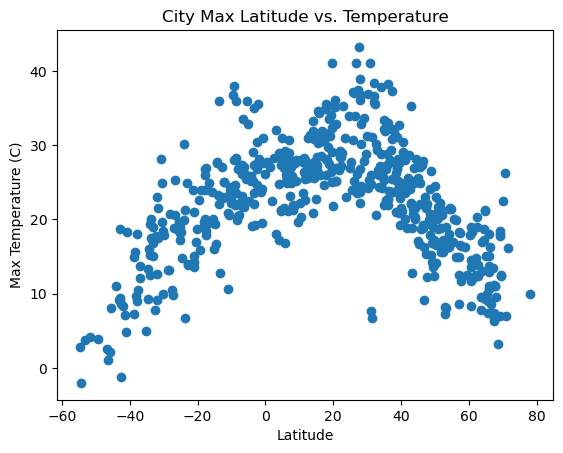

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

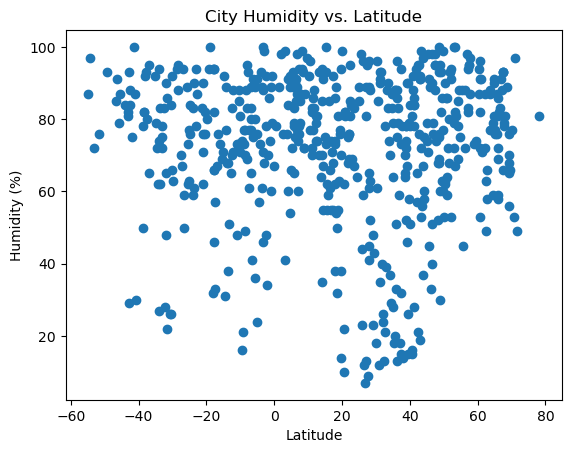

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

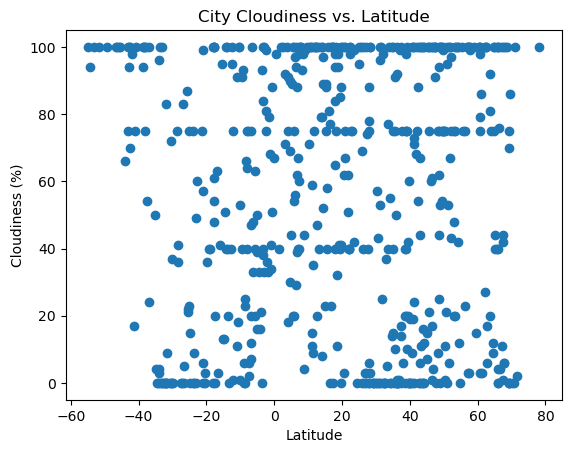

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Cloudiness vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

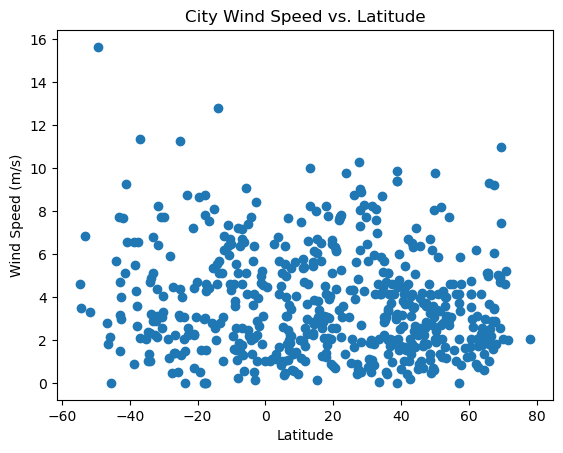

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Wind Speed vs. Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x,y, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print("The r-value is: " + str(rvalue))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,la sarre,48.8002,-79.1996,20.49,60,53,3.27,CA,1691696482
6,san vicente de chucuri,6.8810,-73.4098,30.65,60,67,2.01,CO,1691696633
7,novi pazar,43.1367,20.5122,12.80,91,6,1.83,RS,1691696633
9,jincheng,35.5022,112.8328,22.59,88,91,0.52,CN,1691696634
11,isafjordur,66.0755,-23.1240,11.02,58,100,2.06,IS,1691696443


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.21,76,100,3.29,CL,1691696245
1,karaton,-6.3424,106.1045,21.67,91,48,0.56,ID,1691696534
3,adamstown,-25.0660,-130.1015,18.12,63,23,11.25,PN,1691696440
4,ushuaia,-54.8000,-68.3000,2.81,87,100,4.63,AR,1691696444
5,blackmans bay,-43.0167,147.3167,9.18,82,100,3.15,AU,1691696442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6502427727111164


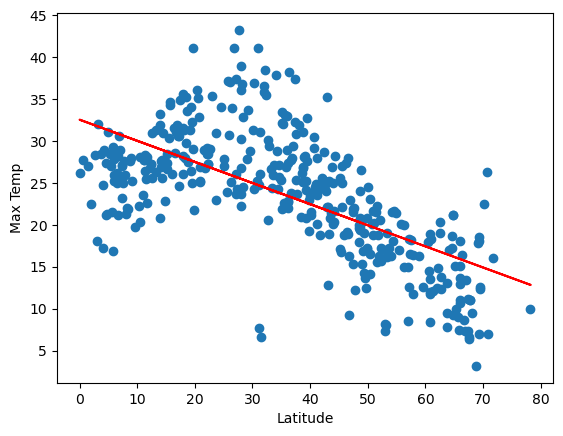

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_reg(x,y, "Latitude", "Max Temp")

The r-value is: 0.7872764048456239


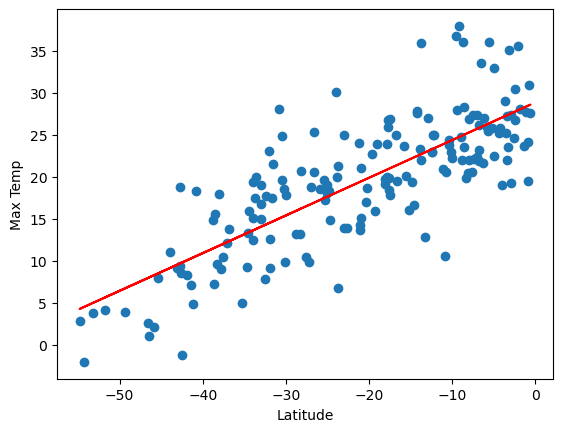

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_reg(x,y, "Latitude", "Max Temp")

**Discussion about the linear relationship:** From the regressions above, we can see that maximum temperature in the northern hemisphere decreases as latitude increases. The opposite is true for the southern hemisphere; maximum temperature increases as latitude increases. This makes sense as both maximum temperatures peak that 0 (the latitude for the equator) and drop at maximum or minimum latitude (the poles).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03599977483524843


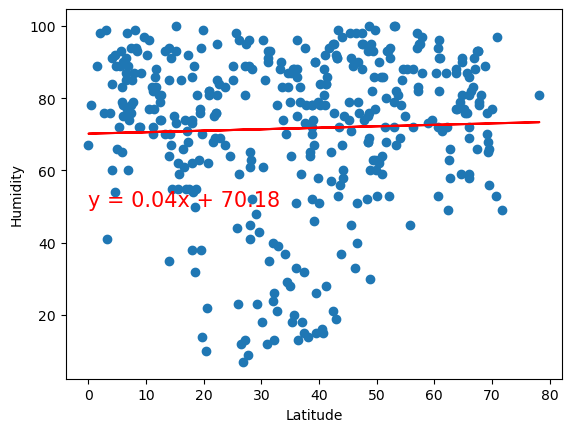

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_reg(x,y, "Latitude", "Humidity")

The r-value is: -0.09456776524891831


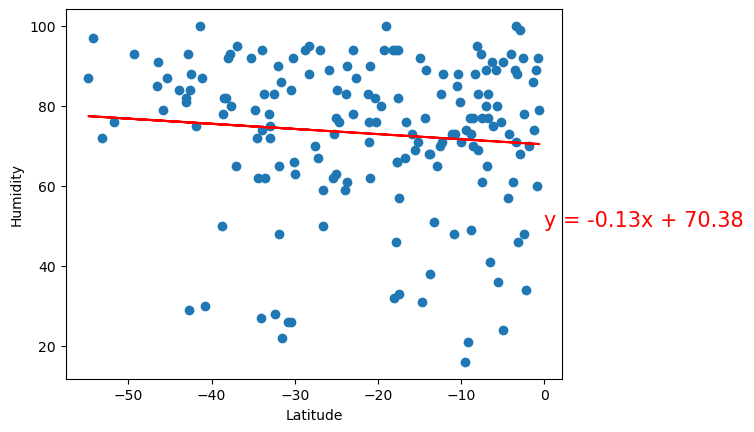

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_reg(x,y, "Latitude", "Humidity")

**Discussion about the linear relationship:** There is honestly not too much that can be said about this relationship from the analysis done above. The absolute r-values are very low. Further, the linear regression shows lines that have close to zero slopes, this is especially true for the northern hemisphere data. I would not make strong conclusions off of this data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.11737700853697172


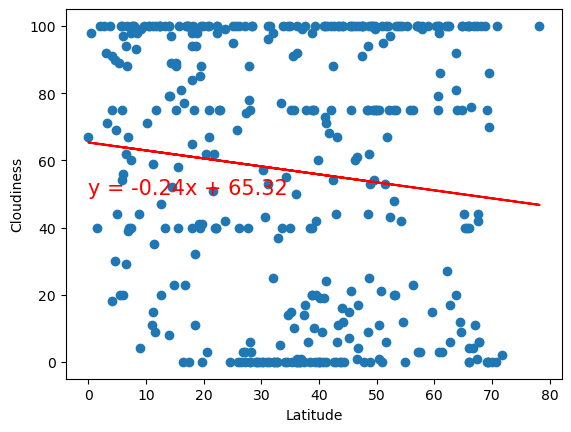

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_reg(x,y, "Latitude", "Cloudiness")

The r-value is: -0.17698158403492464


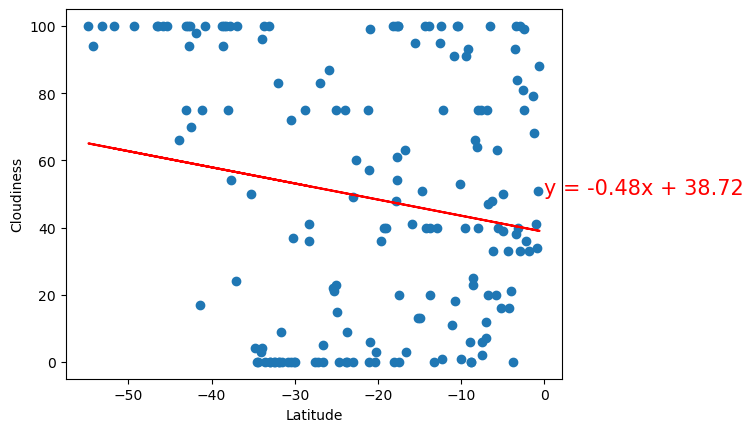

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_reg(x,y, "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Again, I would say there is not much one can confidently say with this regression and r-value. It is best to leave results as inclusive or say there is no clear relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.049639323148327294


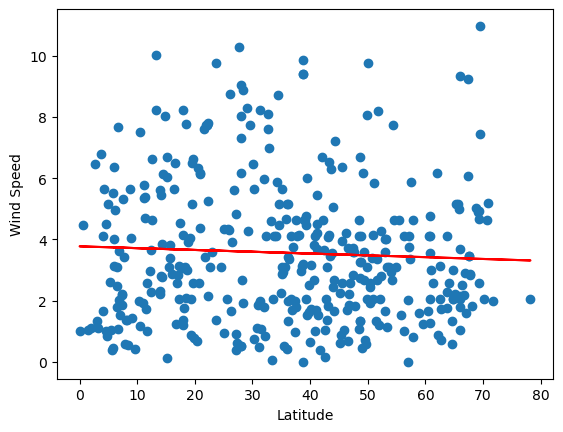

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_reg(x,y, "Latitude", "Wind Speed")

The r-value is: -0.05716497617457637


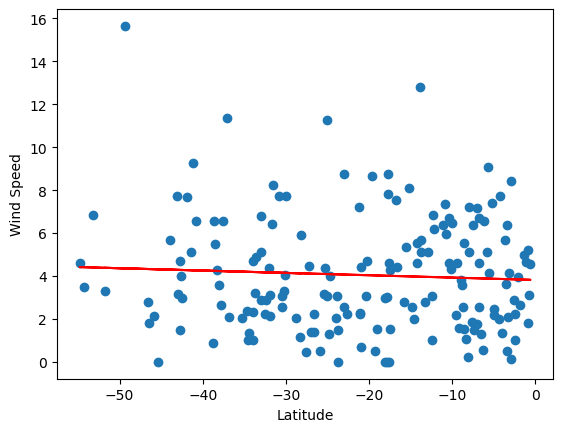

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_reg(x,y, "Latitude", "Wind Speed")

**Discussion about the linear relationship:** Again, I would say there is not much one can confidently say with this regression and r-value. It is best to leave results as inclusive or say there is no clear relationship between wind speed and latitude.